<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-файла" data-toc-modified-id="Открытие-и-изучение-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие и изучение файла</a></span><ul class="toc-item"><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных:</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей,-определение-лучшей" data-toc-modified-id="Исследование-моделей,-определение-лучшей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей, определение лучшей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier,-criterion='Gini'" data-toc-modified-id="DecisionTreeClassifier,-criterion='Gini'-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTreeClassifier, criterion='Gini'</a></span></li><li><span><a href="#DecisionTreeClassifier,-criterion='entropy'" data-toc-modified-id="DecisionTreeClassifier,-criterion='entropy'-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DecisionTreeClassifier, criterion='entropy'</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#RandomForestClassifier,-criterion='entropy'" data-toc-modified-id="RandomForestClassifier,-criterion='entropy'-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>RandomForestClassifier, criterion='entropy'</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рекомендация тарифов

Оператор мобильной связи на основе данных о поведение клиентов хочет предложить пользователям новый тариф: «Смарт» или «Ультра».

Задача: построить модель для классификации, которая выберет подходящий тариф. 

Метрика точности предсказания - accuracy (должна быть больше 0.75).

Данные уже предобработаны. 

 <b>План действий:</b>

1. Открытие файла и изучение датасета.

2. Разделение исходных данных на выборки, для эффективного построения обучающей модели.

3. Построение обучающих моделей, их сравнение, нахождение наиболее эффективной.

4. Проверка качества обучающей модели. 

5. Проверка модели на адекватность. 


## Открытие и изучение файла

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import scatter_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
display(df)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


### Описание данных:

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

`сalls` — количество звонков

`minutes` — суммарная длительность звонков в минутах

`messages` — количество sms-сообщений

`mb_used` — израсходованный интернет-трафик в Мб

`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

## Анализ данных

**Количество пропусков:**

In [5]:
print(df.isna().sum())

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


**Количесвто дубликатов:**

In [6]:
print(df.duplicated().sum())

0


**Уникальные значения в столбцах:**

In [7]:
print(df['calls'].unique())

[ 40.  85.  77. 106.  66.  58.  57.  15.   7.  90.  82.  45.  51.  56.
 108.   6.   2.  26.  79.  49.  93.  48.  11.  53.  81. 154.  37.  50.
  41.  10.  71.  65. 110. 120.  76.  64.  23.  34.  98.  35.   5.  70.
 124. 129.  67.   0.  13.  68.  91. 121. 114. 125.  80.  33. 138.  84.
  78.  69.  63.  72.  73.   1.  43. 118.  74.  83. 141. 117.  54. 101.
  29.   3. 107.  55.  47. 158.  87.  28.  59.  52.  44.  17. 111. 109.
  14.  92.  94.  46. 133.  75.  38.  60. 100.  31.  61.  89.  27. 196.
  24.  99.  62. 162. 116. 123.  18.  21.  12.  86.  32.  95.  39.  30.
  25.  36.  42. 113.   9. 183. 156. 127.  96.  16.   4. 102.  97.  20.
 104. 144.  19. 132. 131. 136.  88. 115. 176. 160. 164. 169.  22. 105.
 152. 177. 161. 112.   8. 126. 178. 103. 130. 198. 119. 137. 150. 122.
 146. 151. 157. 203. 143. 148. 128. 185. 167. 181. 184. 171. 153. 140.
 159. 188. 134. 189. 182. 173. 172. 145. 180. 155. 174. 244. 165. 163.
 142. 168.]


In [8]:
print(df['minutes'].unique())

[311.9  516.75 467.66 ... 634.44 462.32 566.09]


In [9]:
print(df['messages'].unique())

[ 83.  56.  86.  81.   1.  21.  20.   6.   3.  38.  13.  61.  16.   0.
   4.  90.  31.  97.  66.  19.  30.  52.  48.  44.  27.   7.   9.  43.
  33.  34.  10. 106.  65.  17.  11.  29.  75.  47.  49.  64. 144.  99.
  46.  24.  22.  55.   8.  93. 153.  37.  69.  18.  78.  42.  82.  62.
  40.  57.  60.  58. 123.  26.  51. 109.   5.  39.  35.  79.  12. 182.
  36. 126.  59. 102.  14. 133. 110.  54.  72. 103.  23. 108.  92.  73.
  15.  25.  91. 113. 105.  85. 191.  32.  50. 145.  41. 150.  53. 171.
 176.  68.  28.  76.  71. 118.  63. 132.  84.   2.  67. 111. 101.  96.
 112.  95.  89. 143.  45.  70.  77.  94. 137. 107.  98. 141. 124. 129.
 114.  87.  80. 117. 138. 142. 134. 128. 180. 115. 154.  74. 185. 121.
 127. 116.  88. 140. 201. 100. 169. 155. 135. 151. 139. 131. 188. 157.
 148. 104. 224. 158. 211. 120. 149. 190. 173. 172. 146. 162. 119. 178.
 223. 130. 122. 159. 181. 125. 152. 197. 136. 165. 183. 170.]


In [10]:
print(df['mb_used'].unique())

[19915.42 22696.96 21060.45 ... 13974.06 31239.78 29480.52]


In [11]:
print(df['is_ultra'].unique())

[0 1]


<b>Вывод:</b>

Пропущенных значений нет. Дубликатов нет. Данные аномалий не содержат.


**Проверка взаимосвязи данных:**

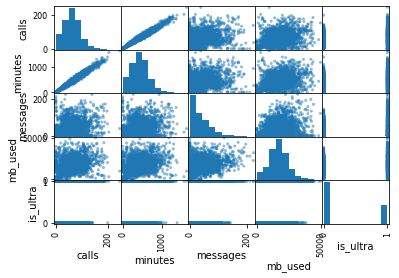

In [12]:
pd.plotting.scatter_matrix(df)
plt.show()

In [13]:
print(df['calls'].corr(df['minutes']))

0.9820832355742292


Зависимость мужду минутами и количеством звонком очень сильная, удалим столбец с минутами из таблицы.


In [14]:
df = df.drop(['calls'], axis=1)
display(df)

,minutes,messages,mb_used,is_ultra
0,311.90,83.0,19915.42,0
1,516.75,56.0,22696.96,0
2,467.66,86.0,21060.45,0
3,745.53,81.0,8437.39,1
4,418.74,1.0,14502.75,0
...,...,...,...,...
3209,910.98,20.0,35124.90,1
3210,190.36,0.0,3275.61,0
3211,634.44,70.0,13974.06,0
3212,462.32,90.0,31239.78,0


## Разделение данных на выборки

**stratify=target (для равного отношения классов в выборках):**

In [15]:
target = df['is_ultra']

In [16]:
df_train, df_2 = train_test_split(df, test_size=0.4, random_state=12345, stratify=target) 
df_valid, df_test = train_test_split(df_2, test_size=0.5, random_state=12345)


**Проверка размера выборок:**

In [17]:
print(df_train.shape)
print()
print(len(df_train))
print()
print(df_valid.shape)
print()
print(len(df_valid))
print()
print(df_test.shape)
print()
print(len(df_test))
print()

(1928, 4)

1928

(643, 4)

643

(643, 4)

643



df_train - обучающая (тренировочная) выборка,

df_valid - валидационная выборка,

df_test - тестовая выборка.

## Исследование моделей, определение лучшей

Перед нами стоит задача бинарной классификации.

0 - тариф "Смарт.

1 - тариф "Ультра".

Для качественного предсказания нужного тарифа по предоставленным данным, рассмотрим три модели машинного обучения с различными гиперпараметрами. Посчитаем долю правильных ответов для каждой модели и выберем лучшую.

**Разделение данных на признаки и целевой признак:**

In [18]:
# Признаки и целевой признак 

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']


### DecisionTreeClassifier, criterion='Gini'

In [19]:
# Решающее дерево с глубиной от 1 до 11, критерий Джини

for depth in range(1, 12):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)

    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 



max_depth = 1 : 0.7309486780715396
max_depth = 2 : 0.7698289269051322
max_depth = 3 : 0.7807153965785381
max_depth = 4 : 0.7682737169517885
max_depth = 5 : 0.7744945567651633
max_depth = 6 : 0.7947122861586314
max_depth = 7 : 0.7962674961119751
max_depth = 8 : 0.7978227060653188
max_depth = 9 : 0.7993779160186625
max_depth = 10 : 0.7900466562986003
max_depth = 11 : 0.7744945567651633


### DecisionTreeClassifier, criterion='entropy'

In [20]:
# Решающее дерево с глубиной от 1 до 11, энтропийный критерий 

for depth in range(1, 12):
    model = DecisionTreeClassifier(criterion='entropy', random_state=12345, max_depth=depth)

    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid)) 

max_depth = 1 : 0.7309486780715396
max_depth = 2 : 0.7698289269051322
max_depth = 3 : 0.7807153965785381
max_depth = 4 : 0.7744945567651633
max_depth = 5 : 0.7978227060653188
max_depth = 6 : 0.7962674961119751
max_depth = 7 : 0.8040435458786936
max_depth = 8 : 0.807153965785381
max_depth = 9 : 0.8055987558320373
max_depth = 10 : 0.7698289269051322
max_depth = 11 : 0.776049766718507


### LogisticRegression

In [21]:
# Логистическая регрессия

model = LogisticRegression(random_state=12345) 

model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)

print("Accuracy модели логистической регрессии на валидационной выборке:", accuracy_score(target_valid, predictions_valid))

Accuracy модели логистической регрессии на валидационной выборке: 0.7216174183514774


### RandomForestClassifier

In [22]:
# Случайный лес 

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 18):
    for depth in range (1, 18):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

Accuracy наилучшей модели на валидационной выборке: 0.833592534992224 Количество деревьев: 15 Максимальная глубина: 17


### RandomForestClassifier, criterion='entropy'

In [23]:
# Случайный лес, энтропийный критерий 

best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 18):
    for depth in range (1, 18):
        model = RandomForestClassifier(criterion='entropy', random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid) 
        result = accuracy_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

Accuracy наилучшей модели на валидационной выборке: 0.8258164852255054 Количество деревьев: 13 Максимальная глубина: 17


<b>Вывод:</b>

Среди всех моделей и гиперпараметров лучший результат наблюдается у "случайного леса" с глубиной 17, количества деревьев 15 и критерием 'джини'.  Проверим работу этой модели на тестовой выборке. Для этого соединим валидационную выборку и обучающую выборку и на этой общей выборке обучим модель.

## Проверка модели на тестовой выборке

**Объединение валидационной выборки и обучающей:**

In [24]:
df_t_v = pd.concat([df_valid, df_train], axis=0)
display(df_t_v)



,minutes,messages,mb_used,is_ultra
1725,645.72,0.0,14586.92,0
2061,478.48,0.0,16962.58,0
2440,466.60,0.0,17353.48,0
1568,261.03,72.0,14587.09,0
2500,353.63,29.0,24852.78,0
...,...,...,...,...
1967,654.92,40.0,18362.08,0
920,732.20,44.0,28042.76,1
2456,169.77,16.0,11684.21,1
756,401.45,91.0,19021.56,0


In [25]:
features_t_v = df_t_v.drop(['is_ultra'], axis=1)
target_t_v = df_t_v['is_ultra']

In [26]:
model = RandomForestClassifier(random_state=12345, n_estimators=15, max_depth=17) 
model.fit(features_t_v, target_t_v) 
predictions_test = model.predict(features_test) 
result = accuracy_score(target_test, predictions_test)
print(result)

0.7900466562986003


<b>Вывод:</b>

Модель на тестовой выборке показывает меньшее знаение доли правильных ответов, тем не менее, оно больше порогового значения в 0.75

## Проверка модели на адекватность

**Распределение классов у целевого признака:**

In [27]:
print(df_t_v['is_ultra'].value_counts())

0    1782
1     789
Name: is_ultra, dtype: int64


**«Most_frequent»: всегда предсказывает наиболее частую метку в обучающем наборе.**

In [28]:
features_t_v = df_t_v.drop(['is_ultra'], axis=1)
target_t_v = df_t_v['is_ultra']

model = DummyClassifier(strategy="most_frequent")
model.fit(features_t_v, target_t_v)
predictions_t_v = model.predict(features_t_v) 
result = accuracy_score(target_t_v, predictions_t_v)
print(result)

0.6931155192532089


**Вывод:**

Метрика при таком предсказании - 0.69, она меньше нашей полученной метрики в 0.79, соответственно модель предсказывает адекватно.

## Вывод

Построили обучающую модель, которая предсказывает нужный тариф для клиентов оператора мобильной связи. Добились точности в 79%. Проверили модель на адекватность.

Вот такие дела.